# Import Gdrive

In [731]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries


In [732]:
import os
import pandas as pd
import numpy as np
from datetime import datetime as dt
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

### Import 3 data Tokopedia,Shoppe, dan WA

In [733]:
#Data Tokopedia
df = pd.read_excel("/content/drive/MyDrive/Waku/KK/Copy of KK_tokped2.xlsx")

In [734]:
df.head()

,Count,Order ID,Invoice,Payment Date,Order Status,Product ID,Product Name,Quantity,Stock Keeping Unit (SKU),Harga Awal (Rp.),...,Recipient Address,Courier,Shipping Price + fee (Rp.),Insurance (Rp.),Total Shipping Fee (Rp.),Total Amount (Rp.),Jenis Layanan,Bebas Ongkir,Warehouse Origin,Campaign Name
0,1.0,1.072797e+09,INV/20220115/MPL/1949348052,15-01-2022 09:12:23,Transaksi selesai..\nDana akan diteruskan ke p...,2.731133e+09,Kriz Kraz - Keripik Kentang Balado - 75gr,2,NaN,12000,...,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",AnterAja(Economy),8000,400,8400,66400.0,-,NaN,Shop Location,NaN
1,2.0,1.072797e+09,INV/20220115/MPL/1949348052,15-01-2022 09:12:23,Transaksi selesai..\nDana akan diteruskan ke p...,2.731148e+09,Kriz Kraz - Keripik Singkong Jagung Bakar,1,NaN,17000,...,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",AnterAja(Economy),8000,400,8400,66400.0,-,NaN,Shop Location,NaN
2,NaN,1.072797e+09,INV/20220115/MPL/1949348052,15-01-2022 09:12:23,Transaksi selesai..\nDana akan diteruskan ke p...,2.731142e+09,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1,NaN,17000,...,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",AnterAja(Economy),8000,400,8400,66400.0,-,NaN,Shop Location,NaN
3,2.0,1.072799e+09,INV/20220115/MPL/1949353935,15-01-2022 12:05:47,Transaksi selesai..\nDana akan diteruskan ke p...,2.731105e+09,Kriz Kraz - Keripik Kentang Keju - 75gr,1,NaN,12000,...,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",AnterAja(Economy),23000,500,23500,100500.0,-,NaN,Shop Location,NaN
4,NaN,1.072799e+09,INV/20220115/MPL/1949353935,15-01-2022 12:05:47,Transaksi selesai..\nDana akan diteruskan ke p...,2.731148e+09,Kriz Kraz - Keripik Singkong Jagung Bakar,1,NaN,17000,...,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",AnterAja(Economy),23000,500,23500,100500.0,-,NaN,Shop Location,NaN


In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Count                       22 non-null     float64
 1   Order ID                    57 non-null     float64
 2   Invoice                     313 non-null    object 
 3   Payment Date                313 non-null    object 
 4   Order Status                313 non-null    object 
 5   Product ID                  57 non-null     float64
 6   Product Name                343 non-null    object 
 7   Quantity                    343 non-null    int64  
 8   Stock Keeping Unit (SKU)    0 non-null      float64
 9   Harga Awal (Rp.)            343 non-null    int64  
 10  Discount Amount (Rp.)       285 non-null    float64
 11  Subsidi Amount (Rp.)        285 non-null    float64
 12  Harga Jual (Rp.)            343 non-null    int64  
 13  Nilai Voucher               228 non

In [736]:
#Data Shoppe
df1 = pd.read_excel("/content/drive/MyDrive/Waku/KK/KK_shoppe.xlsx")

In [737]:
df1.head()

,No. Pesanan,Status Pesanan,Alasan Pembatalan,Status Pembatalan/ Pengembalian,Unnamed: 4,Opsi Pengiriman,Antar ke counter/ pick-up,Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan),Waktu Pengiriman Diatur,Waktu Pesanan Dibuat,...,Perkiraan Ongkos Kirim,Catatan dari Pembeli,Catatan,Unnamed: 40,Unnamed: 41,Unnamed: 42,Alamat Pengiriman,Kota/Kabupaten,Provinsi,Waktu Pesanan Selesai
0,220101MXSM7UXC,Selesai,NaN,NaN,NaN,Instant-GrabExpress Instant,Pickup,2022-01-03 23:30,2022-01-02 11:11,2022-01-01 14:11,...,Rp 22.000,NaN,NaN,NaN,NaN,NaN,Kamal raya outher ringroad komplek ruko citypa...,KOTA JAKARTA BARAT,DKI JAKARTA,2022-01-02 19:29
1,220101MXSM7UXC,Selesai,NaN,NaN,NaN,Instant-GrabExpress Instant,Pickup,2022-01-03 23:30,2022-01-02 11:11,2022-01-01 14:11,...,Rp 22.000,NaN,NaN,NaN,NaN,NaN,Kamal raya outher ringroad komplek ruko citypa...,KOTA JAKARTA BARAT,DKI JAKARTA,2022-01-02 19:29
2,211216A9CDN371,Selesai,NaN,NaN,NaN,Same Day-GrabExpress Sameday,Pickup,2021-12-22 23:30,2021-12-18 18:05,2021-12-16 18:34,...,Rp 13.000,NaN,NaN,NaN,NaN,NaN,"LTC Glodok, Jl. Hayam Wuruk 127, Lantai 2 Blok...",KOTA JAKARTA BARAT,DKI JAKARTA,2021-12-19 10:58
3,211216A9CDN371,Selesai,NaN,NaN,NaN,Same Day-GrabExpress Sameday,Pickup,2021-12-22 23:30,2021-12-18 18:05,2021-12-16 18:34,...,Rp 13.000,NaN,NaN,NaN,NaN,NaN,"LTC Glodok, Jl. Hayam Wuruk 127, Lantai 2 Blok...",KOTA JAKARTA BARAT,DKI JAKARTA,2021-12-19 10:58
4,211216A9CDN371,Selesai,NaN,NaN,NaN,Same Day-GrabExpress Sameday,Pickup,2021-12-22 23:30,2021-12-18 18:05,2021-12-16 18:34,...,Rp 13.000,NaN,NaN,NaN,NaN,NaN,"LTC Glodok, Jl. Hayam Wuruk 127, Lantai 2 Blok...",KOTA JAKARTA BARAT,DKI JAKARTA,2021-12-19 10:58


In [738]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10361 entries, 0 to 10360
Data columns (total 47 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   No. Pesanan                                                   10361 non-null  object 
 1   Status Pesanan                                                10361 non-null  object 
 2   Alasan Pembatalan                                             0 non-null      float64
 3   Status Pembatalan/ Pengembalian                               36 non-null     object 
 4   Unnamed: 4                                                    0 non-null      float64
 5   Opsi Pengiriman                                               10361 non-null  object 
 6   Antar ke counter/ pick-up                                     9735 non-null   object 
 7   Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)  10332

In [739]:
#Data WA
df2=pd.read_excel('/content/drive/MyDrive/Waku/KK/MASTER KRIZKRAZ.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [740]:
df2.head()

,Nama,Order Number,Tanggal,No hp,Alamat,Kota,Kecamatan,Kodepos,Ayam Bwg 75gr,12000,...,17000.1,Rumput Laut 200 gr,17000.2,Renggi AP,Renggi BBQ,Renggi Ori,Box,Ongkir,Total produk,Total Harga
0,NaN,JKT111-09092021-077-A001,2021-09-09,NaN,Serenia Hills Blok Quantum NO. 11 Jl. Karang T...,Jakarta Selatan,Lebak bulus,12440,1.0,12000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,NaN,59000.0
1,NaN,JKT111-09092021-077-A002,2021-09-09,NaN,"Serenia hill tahap 2, Venture timur 10, Lebak ...",Jakarta Selatan,Lebak bulus,12440,1.0,12000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,NaN,59000.0
2,NaN,JKT111-09092021-077-A003,2021-09-09,NaN,Pomentia Residence #B6 Jalan Aselih RT 009 RW ...,Jakarta Selatan,Jagakarsa,12630,2.0,24000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,99000.0
3,NaN,JKT111-09092021-077-A004,2021-09-09,NaN,Jalan Madrasah no 8 Ampera jakarta Selatan Cil...,Jakarta Selatan,Cilandak Timur,-,1.0,12000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,NaN,59000.0
4,NaN,JKT111-09092021-077-A005,2021-09-09,NaN,Bintaro Park 1 Blok A No.2 Sektor 3a Rt3/Rw/6 ...,Tangerang Selatan,Pondok Ranji,-,6.0,72000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000.0,NaN,261000.0


# Data Preparation


### Data WhatsApp

In [741]:
df2.columns[0:52].tolist()

['Nama',
 'Order Number',
 'Tanggal',
 'No hp',
 'Alamat',
 'Kota',
 'Kecamatan',
 'Kodepos',
 'Ayam Bwg 75gr',
 12000,
 'Balado 75gr',
 '12000.1',
 'Keju 75gr',
 '12000.2',
 'Ayam Bwg 200gr',
 29000,
 'Balado 200gr',
 '29000.1',
 'Keju 200gr',
 '29000.2',
 'Original 200 gr',
 17000,
 'Jagung Bakar 200 gr',
 '17000.1',
 'Rumput Laut 200 gr',
 '17000.2',
 'Renggi AP',
 'Renggi BBQ',
 'Renggi Ori',
 'Box',
 'Ongkir',
 'Total produk',
 'Total Harga']

In [742]:
df2=df2.drop([ 12000,
  '12000.1',
  '12000.2',
 29000,
 '29000.1',
 '29000.2',
 17000,
 '17000.1',
  '17000.2'],axis=1)

In [743]:
df2

,Nama,Order Number,Tanggal,No hp,Alamat,Kota,Kecamatan,Kodepos,Ayam Bwg 75gr,Balado 75gr,...,Original 200 gr,Jagung Bakar 200 gr,Rumput Laut 200 gr,Renggi AP,Renggi BBQ,Renggi Ori,Box,Ongkir,Total produk,Total Harga
0,NaN,JKT111-09092021-077-A001,2021-09-09,NaN,Serenia Hills Blok Quantum NO. 11 Jl. Karang T...,Jakarta Selatan,Lebak bulus,12440,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,NaN,59000.0
1,NaN,JKT111-09092021-077-A002,2021-09-09,NaN,"Serenia hill tahap 2, Venture timur 10, Lebak ...",Jakarta Selatan,Lebak bulus,12440,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,NaN,59000.0
2,NaN,JKT111-09092021-077-A003,2021-09-09,NaN,Pomentia Residence #B6 Jalan Aselih RT 009 RW ...,Jakarta Selatan,Jagakarsa,12630,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,99000.0
3,NaN,JKT111-09092021-077-A004,2021-09-09,NaN,Jalan Madrasah no 8 Ampera jakarta Selatan Cil...,Jakarta Selatan,Cilandak Timur,-,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,NaN,59000.0
4,NaN,JKT111-09092021-077-A005,2021-09-09,NaN,Bintaro Park 1 Blok A No.2 Sektor 3a Rt3/Rw/6 ...,Tangerang Selatan,Pondok Ranji,-,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000.0,NaN,261000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,NaN,JKT111-15022023-077-A109,2023-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1445000.0
131,NaN,JKT111-14022023-077-A110,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,2.0,2.0,2.0,3.0,NaN,NaN,NaN,476179.0
132,NaN,JKT111-14022023-077-A111,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,31200.0
133,NaN,JKT111-14022023-077-A112,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26520.0


In [744]:
dft=df2[['Total Harga','Ongkir']]

In [745]:
df2_melt = pd.melt(df2,
                id_vars=['Nama', 'Order Number',
                          'Tanggal','No hp','Alamat',
                          'Kota','Kecamatan','Kodepos','Box',
                          'Total produk'],
               value_vars=df2.columns[8:20].tolist(),
               var_name="product_name",
               value_name="quantity")

df2_melt.head()

,Nama,Order Number,Tanggal,No hp,Alamat,Kota,Kecamatan,Kodepos,Box,Total produk,product_name,quantity
0,NaN,JKT111-09092021-077-A001,2021-09-09,NaN,Serenia Hills Blok Quantum NO. 11 Jl. Karang T...,Jakarta Selatan,Lebak bulus,12440,NaN,NaN,Ayam Bwg 75gr,1.0
1,NaN,JKT111-09092021-077-A002,2021-09-09,NaN,"Serenia hill tahap 2, Venture timur 10, Lebak ...",Jakarta Selatan,Lebak bulus,12440,NaN,NaN,Ayam Bwg 75gr,1.0
2,NaN,JKT111-09092021-077-A003,2021-09-09,NaN,Pomentia Residence #B6 Jalan Aselih RT 009 RW ...,Jakarta Selatan,Jagakarsa,12630,NaN,NaN,Ayam Bwg 75gr,2.0
3,NaN,JKT111-09092021-077-A004,2021-09-09,NaN,Jalan Madrasah no 8 Ampera jakarta Selatan Cil...,Jakarta Selatan,Cilandak Timur,-,NaN,NaN,Ayam Bwg 75gr,1.0
4,NaN,JKT111-09092021-077-A005,2021-09-09,NaN,Bintaro Park 1 Blok A No.2 Sektor 3a Rt3/Rw/6 ...,Tangerang Selatan,Pondok Ranji,-,NaN,NaN,Ayam Bwg 75gr,6.0


In [746]:
df2_melt

,Nama,Order Number,Tanggal,No hp,Alamat,Kota,Kecamatan,Kodepos,Box,Total produk,product_name,quantity
0,NaN,JKT111-09092021-077-A001,2021-09-09,NaN,Serenia Hills Blok Quantum NO. 11 Jl. Karang T...,Jakarta Selatan,Lebak bulus,12440,NaN,NaN,Ayam Bwg 75gr,1.0
1,NaN,JKT111-09092021-077-A002,2021-09-09,NaN,"Serenia hill tahap 2, Venture timur 10, Lebak ...",Jakarta Selatan,Lebak bulus,12440,NaN,NaN,Ayam Bwg 75gr,1.0
2,NaN,JKT111-09092021-077-A003,2021-09-09,NaN,Pomentia Residence #B6 Jalan Aselih RT 009 RW ...,Jakarta Selatan,Jagakarsa,12630,NaN,NaN,Ayam Bwg 75gr,2.0
3,NaN,JKT111-09092021-077-A004,2021-09-09,NaN,Jalan Madrasah no 8 Ampera jakarta Selatan Cil...,Jakarta Selatan,Cilandak Timur,-,NaN,NaN,Ayam Bwg 75gr,1.0
4,NaN,JKT111-09092021-077-A005,2021-09-09,NaN,Bintaro Park 1 Blok A No.2 Sektor 3a Rt3/Rw/6 ...,Tangerang Selatan,Pondok Ranji,-,NaN,NaN,Ayam Bwg 75gr,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1615,NaN,JKT111-15022023-077-A109,2023-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,NaN
1616,NaN,JKT111-14022023-077-A110,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,3.0
1617,NaN,JKT111-14022023-077-A111,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,1.0
1618,NaN,JKT111-14022023-077-A112,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,NaN


In [747]:
df2_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620 entries, 0 to 1619
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Nama          0 non-null      float64       
 1   Order Number  1368 non-null   object        
 2   Tanggal       1404 non-null   datetime64[ns]
 3   No hp         0 non-null      float64       
 4   Alamat        996 non-null    object        
 5   Kota          156 non-null    object        
 6   Kecamatan     156 non-null    object        
 7   Kodepos       156 non-null    object        
 8   Box           984 non-null    float64       
 9   Total produk  48 non-null     object        
 10  product_name  1620 non-null   object        
 11  quantity      319 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(7)
memory usage: 152.0+ KB


In [748]:
df2_melt.isnull().sum()

Nama            1620
Order Number     252
Tanggal          216
No hp           1620
Alamat           624
Kota            1464
Kecamatan       1464
Kodepos         1464
Box              636
Total produk    1572
product_name       0
quantity        1301
dtype: int64

In [749]:
df2_melt=df2_melt.dropna(subset=['quantity'],axis=0, how="any").reset_index()

In [750]:
df2_melt

,index,Nama,Order Number,Tanggal,No hp,Alamat,Kota,Kecamatan,Kodepos,Box,Total produk,product_name,quantity
0,0,NaN,JKT111-09092021-077-A001,2021-09-09,NaN,Serenia Hills Blok Quantum NO. 11 Jl. Karang T...,Jakarta Selatan,Lebak bulus,12440,NaN,NaN,Ayam Bwg 75gr,1.0
1,1,NaN,JKT111-09092021-077-A002,2021-09-09,NaN,"Serenia hill tahap 2, Venture timur 10, Lebak ...",Jakarta Selatan,Lebak bulus,12440,NaN,NaN,Ayam Bwg 75gr,1.0
2,2,NaN,JKT111-09092021-077-A003,2021-09-09,NaN,Pomentia Residence #B6 Jalan Aselih RT 009 RW ...,Jakarta Selatan,Jagakarsa,12630,NaN,NaN,Ayam Bwg 75gr,2.0
3,3,NaN,JKT111-09092021-077-A004,2021-09-09,NaN,Jalan Madrasah no 8 Ampera jakarta Selatan Cil...,Jakarta Selatan,Cilandak Timur,-,NaN,NaN,Ayam Bwg 75gr,1.0
4,4,NaN,JKT111-09092021-077-A005,2021-09-09,NaN,Bintaro Park 1 Blok A No.2 Sektor 3a Rt3/Rw/6 ...,Tangerang Selatan,Pondok Ranji,-,NaN,NaN,Ayam Bwg 75gr,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,1611,NaN,JKT111-08022023-077-A106,2023-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,1.0
315,1614,NaN,JKT111-14022023-077-A108,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,2.0
316,1616,NaN,JKT111-14022023-077-A110,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,3.0
317,1617,NaN,JKT111-14022023-077-A111,2023-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Renggi Ori,1.0


### Data Shoppe

In [751]:
df1.columns.tolist()

['No. Pesanan',
 'Status Pesanan',
 'Alasan Pembatalan',
 'Status Pembatalan/ Pengembalian',
 'Unnamed: 4',
 'Opsi Pengiriman',
 'Antar ke counter/ pick-up',
 'Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)',
 'Waktu Pengiriman Diatur',
 'Waktu Pesanan Dibuat',
 'Waktu Pembayaran Dilakukan',
 'SKU Induk',
 'Nama Produk',
 'Nomor Referensi SKU',
 'Nama Variasi',
 'Harga Awal',
 'Harga Setelah Diskon',
 'Jumlah',
 'Total Harga Produk',
 'Total Diskon',
 'Diskon Dari Penjual',
 'Diskon Dari Shopee',
 'Berat Produk',
 'Jumlah Produk di Pesan',
 'Total Berat',
 'Voucher Ditanggung Penjual',
 'Cashback Koin',
 'Voucher Ditanggung Shopee',
 'Paket Diskon',
 'Paket Diskon (Diskon dari Shopee)',
 'Paket Diskon (Diskon dari Penjual)',
 'Potongan Koin Shopee',
 'Diskon Kartu Kredit',
 'Ongkos Kirim Dibayar oleh Pembeli',
 'Estimasi Potongan Biaya Pengiriman',
 'Ongkos Kirim Pengembalian Barang',
 'Total Pembayaran',
 'Perkiraan Ongkos Kirim',
 'Catatan dari Pembeli',
 'Catatan',
 'U

### Data Tokopedia

df.columns.tolist()

### Nambahin kolom Marketplace

In [752]:
df['Market place']='Tokopedia'

In [753]:
df1['Market place']='shoppe'

In [754]:
df2_melt['Market place']='wa'

### Sesuaiin nama kolom dari data tokopedia dan shoppe

In [755]:
df=df.rename(columns={"Subsidi Amount (Rp.)":"Diskon Dari Penjual","Product Name":"Nama Produk","Quantity":"Jumlah","Order ID":"No. Pesanan","Order Status":"Status Pesanan","Recipient Address":"Alamat Pengiriman","Courier":"Opsi Pengiriman","Total Shipping Fee (Rp.)": 'Perkiraan Ongkos Kirim','Payment Date':'Waktu Pembayaran Dilakukan','Harga Awal (Rp.)':'Harga Awal','Harga Jual (Rp.)':'Total Harga Produk','Discount Amount (Rp.)': 'Total Diskon','Total Shipping Fee (Rp.)':'Perkiraan Ongkos Kirim','Total Amount (Rp.)':'Total Pembayaran'})

### Gabungin data tokopedia dan shoppe

In [756]:
datagabungan= pd.concat([df,df1],axis=0)

In [757]:
datagabungan.columns.tolist()

['Count',
 'No. Pesanan',
 'Invoice',
 'Waktu Pembayaran Dilakukan',
 'Status Pesanan',
 'Product ID',
 'Nama Produk',
 'Jumlah',
 'Stock Keeping Unit (SKU)',
 'Harga Awal',
 'Total Diskon',
 'Diskon Dari Penjual',
 'Total Harga Produk',
 'Nilai Voucher',
 'Alamat Pengiriman',
 'Opsi Pengiriman',
 'Shipping Price + fee (Rp.)',
 'Insurance (Rp.)',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Jenis Layanan',
 'Bebas Ongkir',
 'Warehouse Origin',
 'Campaign Name',
 'Market place',
 'Alasan Pembatalan',
 'Status Pembatalan/ Pengembalian',
 'Unnamed: 4',
 'Antar ke counter/ pick-up',
 'Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)',
 'Waktu Pengiriman Diatur',
 'Waktu Pesanan Dibuat',
 'SKU Induk',
 'Nomor Referensi SKU',
 'Nama Variasi',
 'Harga Setelah Diskon',
 'Diskon Dari Shopee',
 'Berat Produk',
 'Jumlah Produk di Pesan',
 'Total Berat',
 'Voucher Ditanggung Penjual',
 'Cashback Koin',
 'Voucher Ditanggung Shopee',
 'Paket Diskon',
 'Paket Diskon (Diskon dari Shop

### Drop kolom yang tidak berguna

In [758]:
datagabungan = datagabungan.drop(['Count',
 'Invoice',
 'Product ID',
 'Stock Keeping Unit (SKU)',
 'Nilai Voucher',
 'Jenis Layanan',
 'Bebas Ongkir',
 'Warehouse Origin',
 'Alasan Pembatalan',
 'Status Pembatalan/ Pengembalian',
 'Unnamed: 4',
 'Antar ke counter/ pick-up',
 'Pesanan Harus Dikirimkan Sebelum (Menghindari keterlambatan)',
 'Waktu Pengiriman Diatur',
 'Waktu Pesanan Dibuat',
 'SKU Induk',
 'Nomor Referensi SKU',
 'Nama Variasi',
 'Diskon Dari Shopee',
 'Berat Produk',
 'Total Berat',
 'Voucher Ditanggung Penjual',
 'Cashback Koin',
 'Voucher Ditanggung Shopee',
 'Paket Diskon',
 'Paket Diskon (Diskon dari Shopee)',
 'Paket Diskon (Diskon dari Penjual)',
 'Potongan Koin Shopee',
 'Diskon Kartu Kredit',
 'Ongkos Kirim Dibayar oleh Pembeli',
 'Estimasi Potongan Biaya Pengiriman',
 'Ongkos Kirim Pengembalian Barang',
 'Catatan dari Pembeli',
 'Catatan',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Campaign Name',
 'Waktu Pesanan Selesai','Shipping Price + fee (Rp.)',
 'Insurance (Rp.)','Harga Setelah Diskon','Jumlah Produk di Pesan','Status Pesanan','Harga Awal',
 'Total Diskon',
 'Diskon Dari Penjual',
 'Total Harga Produk','Opsi Pengiriman'],axis=1)

In [759]:
datagabungan

,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi
0,1072796741.0,15-01-2022 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400.0,Tokopedia,NaN,NaN
1,1072796741.0,15-01-2022 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400.0,Tokopedia,NaN,NaN
2,1072796741.0,15-01-2022 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400.0,Tokopedia,NaN,NaN
3,1072798993.0,15-01-2022 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500.0,Tokopedia,NaN,NaN
4,1072798993.0,15-01-2022 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500.0,Tokopedia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10356,220707SG4DX9W6,2022-07-07 13:58,Keripik singkong rumput laut BBQ / kripik / ca...,1,"Bpk Abdul Azis, Jalan Rasamala Raya No.17, RT....",9,16.8,shoppe,KOTA JAKARTA TIMUR,DKI JAKARTA
10357,2206174F2EB10W,2022-06-18 11:39,Box Menahan Remuk - Ukuran M,1,"Jalan Pembagunan, kelurahan Pasar Bhayangkara,...",48,15.5,shoppe,KAB. PENUKAL ABAB LEMATANG ILIR,SUMATERA SELATAN
10358,220505B55B4EQX,2022-05-05 00:11,Keripik singkong jagung bakar / kripik / camil...,1,"Dtc wonokromo lantai 1 blok a no 43, KOTA SURA...",20,14.45,shoppe,KOTA SURABAYA,JAWA TIMUR
10359,220505C3MNYG2M,2022-05-05 09:19,Keripik singkong Original / kripik / camilan c...,1,Jl raya Tugumulyo rt 02 Kel karang ketuan kota...,38,14.45,shoppe,KOTA LUBUK LINGGAU,SUMATERA SELATAN


In [760]:
datagabungan.columns.tolist()

['No. Pesanan',
 'Waktu Pembayaran Dilakukan',
 'Nama Produk',
 'Jumlah',
 'Alamat Pengiriman',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Market place',
 'Kota/Kabupaten',
 'Provinsi']

In [761]:
df2_melt.columns.tolist()

['index',
 'Nama',
 'Order Number',
 'Tanggal',
 'No hp',
 'Alamat',
 'Kota',
 'Kecamatan',
 'Kodepos',
 'Box',
 'Total produk',
 'product_name',
 'quantity',
 'Market place']

In [762]:
df2_melt=df2_melt.drop(['Nama','No hp','Total produk','Kecamatan','Kodepos','Box','Total produk'],axis=1)

In [763]:
df2_melt=pd.concat([df2_melt,dft],axis=1)

In [764]:
df2_melt=df2_melt.rename(columns={'Order Number':'No. Pesanan','Tanggal':'Waktu Pembayaran Dilakukan','Alamat':'Alamat Pengiriman','Kota':'Kota/Kabupaten','Ongkir':'Perkiraan Ongkos Kirim','Total Harga':'Total Pembayaran','product_name':'Nama Produk','quantity': 'Jumlah'})

In [765]:
df2_melt['Total Pembayaran']=df2_melt['Total Pembayaran'].replace(np.NaN, 0)
df2_melt['Perkiraan Ongkos Kirim']=df2_melt['Perkiraan Ongkos Kirim'].replace(np.NaN, 0)
df2_melt['Alamat Pengiriman']=df2_melt['Alamat Pengiriman'].replace(np.NaN, 'Undefinded')

In [766]:
df2_melt

,index,No. Pesanan,Waktu Pembayaran Dilakukan,Alamat Pengiriman,Kota/Kabupaten,Nama Produk,Jumlah,Market place,Total Pembayaran,Perkiraan Ongkos Kirim
0,0,JKT111-09092021-077-A001,2021-09-09,Serenia Hills Blok Quantum NO. 11 Jl. Karang T...,Jakarta Selatan,Ayam Bwg 75gr,1.0,wa,59000.0,23000.0
1,1,JKT111-09092021-077-A002,2021-09-09,"Serenia hill tahap 2, Venture timur 10, Lebak ...",Jakarta Selatan,Ayam Bwg 75gr,1.0,wa,59000.0,23000.0
2,2,JKT111-09092021-077-A003,2021-09-09,Pomentia Residence #B6 Jalan Aselih RT 009 RW ...,Jakarta Selatan,Ayam Bwg 75gr,2.0,wa,99000.0,27000.0
3,3,JKT111-09092021-077-A004,2021-09-09,Jalan Madrasah no 8 Ampera jakarta Selatan Cil...,Jakarta Selatan,Ayam Bwg 75gr,1.0,wa,59000.0,23000.0
4,4,JKT111-09092021-077-A005,2021-09-09,Bintaro Park 1 Blok A No.2 Sektor 3a Rt3/Rw/6 ...,Tangerang Selatan,Ayam Bwg 75gr,6.0,wa,261000.0,21000.0
...,...,...,...,...,...,...,...,...,...,...
314,1611,JKT111-08022023-077-A106,2023-02-08,Undefinded,NaN,Renggi Ori,1.0,wa,0.0,0.0
315,1614,JKT111-14022023-077-A108,2023-02-14,Undefinded,NaN,Renggi Ori,2.0,wa,0.0,0.0
316,1616,JKT111-14022023-077-A110,2023-02-14,Undefinded,NaN,Renggi Ori,3.0,wa,0.0,0.0
317,1617,JKT111-14022023-077-A111,2023-02-14,Undefinded,NaN,Renggi Ori,1.0,wa,0.0,0.0


In [767]:
df2_melt.isnull().sum()

index                           0
No. Pesanan                     3
Waktu Pembayaran Dilakukan      0
Alamat Pengiriman               0
Kota/Kabupaten                281
Nama Produk                     0
Jumlah                          0
Market place                    0
Total Pembayaran                0
Perkiraan Ongkos Kirim          0
dtype: int64

### Gabungan ketiga data

In [768]:
data= pd.concat([datagabungan,df2_melt],axis=0)

In [769]:
data.shape

(11023, 11)

In [770]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11023 entries, 0 to 318
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   No. Pesanan                 10734 non-null  object 
 1   Waktu Pembayaran Dilakukan  10993 non-null  object 
 2   Nama Produk                 11023 non-null  object 
 3   Jumlah                      11023 non-null  float64
 4   Alamat Pengiriman           10993 non-null  object 
 5   Perkiraan Ongkos Kirim      10935 non-null  object 
 6   Total Pembayaran            10993 non-null  object 
 7   Market place                11023 non-null  object 
 8   Kota/Kabupaten              10399 non-null  object 
 9   Provinsi                    10361 non-null  object 
 10  index                       319 non-null    float64
dtypes: float64(2), object(9)
memory usage: 1.0+ MB


In [771]:
#Cek missing value data group
data.isnull().sum()

No. Pesanan                     289
Waktu Pembayaran Dilakukan       30
Nama Produk                       0
Jumlah                            0
Alamat Pengiriman                30
Perkiraan Ongkos Kirim           88
Total Pembayaran                 30
Market place                      0
Kota/Kabupaten                  624
Provinsi                        662
index                         10704
dtype: int64

In [772]:
data=data.dropna(subset=['No. Pesanan','Waktu Pembayaran Dilakukan','Jumlah','Alamat Pengiriman','Perkiraan Ongkos Kirim','Total Pembayaran'],axis=0, how="any").reset_index()

In [773]:
#Cek missing value data group
data.isnull().sum()

level_0                           0
No. Pesanan                       0
Waktu Pembayaran Dilakukan        0
Nama Produk                       0
Jumlah                            0
Alamat Pengiriman                 0
Perkiraan Ongkos Kirim            0
Total Pembayaran                  0
Market place                      0
Kota/Kabupaten                  335
Provinsi                        373
index                         10418
dtype: int64

In [774]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index
0,0,1072796741.0,15-01-2022 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400.0,Tokopedia,NaN,NaN,NaN
1,1,1072796741.0,15-01-2022 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400.0,Tokopedia,NaN,NaN,NaN
2,2,1072796741.0,15-01-2022 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400.0,Tokopedia,NaN,NaN,NaN
3,3,1072798993.0,15-01-2022 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500.0,Tokopedia,NaN,NaN,NaN
4,4,1072798993.0,15-01-2022 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500.0,Tokopedia,NaN,NaN,NaN


In [775]:
data.tail()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index
10729,314,JKT111-08022023-077-A106,2023-02-08 00:00:00,Renggi Ori,1.0,Undefinded,0.0,0.0,wa,NaN,NaN,1611.0
10730,315,JKT111-14022023-077-A108,2023-02-14 00:00:00,Renggi Ori,2.0,Undefinded,0.0,0.0,wa,NaN,NaN,1614.0
10731,316,JKT111-14022023-077-A110,2023-02-14 00:00:00,Renggi Ori,3.0,Undefinded,0.0,0.0,wa,NaN,NaN,1616.0
10732,317,JKT111-14022023-077-A111,2023-02-14 00:00:00,Renggi Ori,1.0,Undefinded,0.0,0.0,wa,NaN,NaN,1617.0
10733,318,JKT111-17022023-077-A113,2023-02-17 00:00:00,Renggi Ori,5.0,Undefinded,0.0,0.0,wa,NaN,NaN,1619.0


In [776]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734 entries, 0 to 10733
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   level_0                     10734 non-null  int64  
 1   No. Pesanan                 10734 non-null  object 
 2   Waktu Pembayaran Dilakukan  10734 non-null  object 
 3   Nama Produk                 10734 non-null  object 
 4   Jumlah                      10734 non-null  float64
 5   Alamat Pengiriman           10734 non-null  object 
 6   Perkiraan Ongkos Kirim      10734 non-null  object 
 7   Total Pembayaran            10734 non-null  object 
 8   Market place                10734 non-null  object 
 9   Kota/Kabupaten              10399 non-null  object 
 10  Provinsi                    10361 non-null  object 
 11  index                       316 non-null    float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1006.4+ KB


###Mengganti data types group

In [777]:
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('Rp', '').replace('.', ''))
    return(x)

In [778]:
#mengganti data types group
data['Perkiraan Ongkos Kirim'] = data['Perkiraan Ongkos Kirim'].apply(clean_currency).astype('float')
data['Total Pembayaran'] = data['Total Pembayaran'].apply(clean_currency).astype('float')
data['Nama Produk'] = data['Nama Produk'].astype(str)
data['Waktu Pembayaran Dilakukan'] = pd.to_datetime(data['Waktu Pembayaran Dilakukan'], errors='coerce')
data['Alamat Pengiriman'] = data['Alamat Pengiriman'].astype(str)
data['Perkiraan Ongkos Kirim'] = data['Perkiraan Ongkos Kirim'].astype(int)
data['Total Pembayaran'] = data['Total Pembayaran'].astype(int)
data['Market place'] = data['Market place'].astype(str)
data['Kota/Kabupaten'] = data['Kota/Kabupaten'].astype(str)

In [779]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500,Tokopedia,nan,NaN,NaN
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500,Tokopedia,nan,NaN,NaN


In [780]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734 entries, 0 to 10733
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   level_0                     10734 non-null  int64         
 1   No. Pesanan                 10734 non-null  object        
 2   Waktu Pembayaran Dilakukan  10705 non-null  datetime64[ns]
 3   Nama Produk                 10734 non-null  object        
 4   Jumlah                      10734 non-null  float64       
 5   Alamat Pengiriman           10734 non-null  object        
 6   Perkiraan Ongkos Kirim      10734 non-null  int64         
 7   Total Pembayaran            10734 non-null  int64         
 8   Market place                10734 non-null  object        
 9   Kota/Kabupaten              10734 non-null  object        
 10  Provinsi                    10361 non-null  object        
 11  index                       316 non-null    float64   

In [781]:
data['Dates'] = pd.to_datetime(data['Waktu Pembayaran Dilakukan'], format='%M').dt.date
data['Hours'] = pd.to_datetime(data['Waktu Pembayaran Dilakukan'], format='%Y:%M:%D').dt.time

In [782]:
data['Dates']= pd.to_datetime(data['Dates'], errors='coerce')
data['Hours']= pd.to_datetime(data['Hours'], errors='coerce')

In [783]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500,Tokopedia,nan,NaN,NaN,2022-01-15,NaT


In [784]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10734 entries, 0 to 10733
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   level_0                     10734 non-null  int64         
 1   No. Pesanan                 10734 non-null  object        
 2   Waktu Pembayaran Dilakukan  10705 non-null  datetime64[ns]
 3   Nama Produk                 10734 non-null  object        
 4   Jumlah                      10734 non-null  float64       
 5   Alamat Pengiriman           10734 non-null  object        
 6   Perkiraan Ongkos Kirim      10734 non-null  int64         
 7   Total Pembayaran            10734 non-null  int64         
 8   Market place                10734 non-null  object        
 9   Kota/Kabupaten              10734 non-null  object        
 10  Provinsi                    10361 non-null  object        
 11  index                       316 non-null    float64   

In [785]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400,66400,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500,100500,Tokopedia,nan,NaN,NaN,2022-01-15,NaT


# EXPLORATORY DATA ANALYSIS

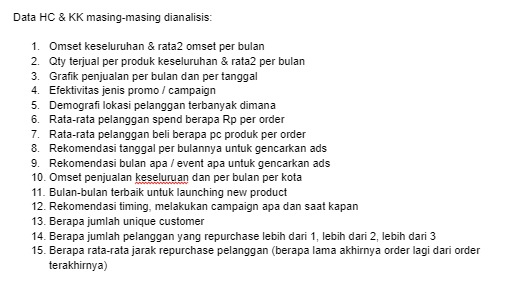

In [786]:
def cek_pembayaran_ongkir (pembayaran):
  
  digit = float (pembayaran)
  # print (digit)
  if digit <= 100:
    clean_pembayaran = digit * 1000
    return clean_pembayaran
    # print (pembayaran)
  else :
    return digit
    # print (pembayaran)

In [787]:
def cek_pembayaran (omset):
  
  digit = float (omset)
  # print (digit)
  if digit <= 1000:
    clean_pembayaran = digit * 1000
    return clean_pembayaran
    # print (pembayaran)
  else :
    return digit
    # print (pembayaran)

In [788]:
data['Perkiraan Ongkos Kirim'] = data['Perkiraan Ongkos Kirim'].apply(lambda x: cek_pembayaran_ongkir(x))
data['Total Pembayaran'] = data['Total Pembayaran'].apply(lambda x: cek_pembayaran(x))

#Shopee

In [789]:
Data1=data[['Market place','Total Pembayaran','Jumlah','Perkiraan Ongkos Kirim','Alamat Pengiriman']]


In [790]:
Data1.head()

,Market place,Total Pembayaran,Jumlah,Perkiraan Ongkos Kirim,Alamat Pengiriman
0,Tokopedia,66400.0,2.0,8400.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B..."
1,Tokopedia,66400.0,1.0,8400.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B..."
2,Tokopedia,66400.0,1.0,8400.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B..."
3,Tokopedia,100500.0,1.0,23500.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay..."
4,Tokopedia,100500.0,1.0,23500.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay..."


In [791]:
set[Data1['Market place']]

set[0        Tokopedia
1        Tokopedia
2        Tokopedia
3        Tokopedia
4        Tokopedia
           ...    
10729           wa
10730           wa
10731           wa
10732           wa
10733           wa
Name: Market place, Length: 10734, dtype: object]

In [792]:
Data_Shopee=Data1[(Data1['Market place']=='shoppe')]

In [793]:
Data_Shopee['Omset']=Data_Shopee['Total Pembayaran']-Data_Shopee['Perkiraan Ongkos Kirim']

<ipython-input-793-257dda4e3a3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Shopee['Omset']=Data_Shopee['Total Pembayaran']-Data_Shopee['Perkiraan Ongkos Kirim']


In [794]:
Data_Shopee['Omset'].head()

57    77990.0
58    77990.0
59    86600.0
60    86600.0
61    86600.0
Name: Omset, dtype: float64

In [795]:
Data_Shopee['Omset'].sum()

740788738.0

In [796]:
Data_Shopee['Jumlah'].sum()

16910.0

In [797]:
Data_Shopee['Alamat Pengiriman'].nunique()

2205

# Tokopedia


In [798]:
Data_Tokopedia=Data1[(Data1['Market place']=='Tokopedia')]

In [799]:
Data_Tokopedia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Market place            57 non-null     object 
 1   Total Pembayaran        57 non-null     float64
 2   Jumlah                  57 non-null     float64
 3   Perkiraan Ongkos Kirim  57 non-null     float64
 4   Alamat Pengiriman       57 non-null     object 
dtypes: float64(3), object(2)
memory usage: 2.7+ KB


In [800]:
Data_Tokopedia['Omset']=Data_Tokopedia['Total Pembayaran']-Data_Tokopedia['Perkiraan Ongkos Kirim']

<ipython-input-800-30a70c8cde42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Tokopedia['Omset']=Data_Tokopedia['Total Pembayaran']-Data_Tokopedia['Perkiraan Ongkos Kirim']


In [801]:
Data_Tokopedia['Omset'].sum()

6957500.0

In [802]:
Data_Tokopedia['Jumlah'].sum()

86.0

In [803]:
Data_Tokopedia['Alamat Pengiriman'].nunique()

21

#WhatsApp


In [804]:
dft.head()

,Total Harga,Ongkir
0,59000.0,23000.0
1,59000.0,23000.0
2,99000.0,27000.0
3,59000.0,23000.0
4,261000.0,21000.0


In [805]:
dft['Omset']=dft['Total Harga']-dft['Ongkir']

<ipython-input-805-7e178c25d7e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Omset']=dft['Total Harga']-dft['Ongkir']


In [806]:
dft['Omset'].sum()

4219910.0

In [807]:
Data_Wa=Data1[(Data1['Market place']=='wa')]

In [808]:
Data_Wa

,Market place,Total Pembayaran,Jumlah,Perkiraan Ongkos Kirim,Alamat Pengiriman
10418,wa,59000.0,1.0,23000.0,Serenia Hills Blok Quantum NO. 11 Jl. Karang T...
10419,wa,59000.0,1.0,23000.0,"Serenia hill tahap 2, Venture timur 10, Lebak ..."
10420,wa,99000.0,2.0,27000.0,Pomentia Residence #B6 Jalan Aselih RT 009 RW ...
10421,wa,59000.0,1.0,23000.0,Jalan Madrasah no 8 Ampera jakarta Selatan Cil...
10422,wa,261000.0,6.0,21000.0,Bintaro Park 1 Blok A No.2 Sektor 3a Rt3/Rw/6 ...
...,...,...,...,...,...
10729,wa,0.0,1.0,0.0,Undefinded
10730,wa,0.0,2.0,0.0,Undefinded
10731,wa,0.0,3.0,0.0,Undefinded
10732,wa,0.0,1.0,0.0,Undefinded


In [809]:
Data_Wa['Omset']=Data_Wa['Total Pembayaran']-Data_Wa['Perkiraan Ongkos Kirim']

<ipython-input-809-aa529a389e77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_Wa['Omset']=Data_Wa['Total Pembayaran']-Data_Wa['Perkiraan Ongkos Kirim']


In [810]:
Data_Wa['Omset'].sum()

17122539.0

In [811]:
Data_Wa['Jumlah'].sum()

936.0

# 1. Omset keseluruhan dan rata2 omset perbulan

In [812]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT


In [813]:
data['year'] = pd.DatetimeIndex(data['Dates']).year
data['month'] = pd.DatetimeIndex(data['Dates']).month
data['day'] = pd.DatetimeIndex(data['Dates']).day

In [814]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,day
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0


In [815]:
Data3=data[['month','day']]

## Data 2022

In [816]:
data2022=pd.DataFrame(data[data['year']==2022.0])

In [817]:
data2022['Omset Keseluruhan'] = data2022['Total Pembayaran']-data2022['Perkiraan Ongkos Kirim']

In [818]:
#Omset Keseluruhan
data2022['Omset Keseluruhan'].sum()

396557063.0

In [819]:
#Rata-rata Omset Perbulan
388487114/12

32373926.166666668

## Data 2021

In [820]:
data2021=pd.DataFrame(data[data['year']==2021.0])

In [821]:
data2021['Omset Keseluruhan'] = data2021['Total Pembayaran']-data2021['Perkiraan Ongkos Kirim']

In [822]:
#Omset Keseluruhan
data2021['Omset Keseluruhan'].sum()

358828304.0

In [823]:
#Rata-rata Omset Perbulan
358828304/4

89707076.0

## Data 2023

In [824]:
data2023=pd.DataFrame(data[data['year']==2023.0])

In [825]:
data2023.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,day
8510,8453,23020215J3KEKV,2023-02-02 19:32:00,Keripik kentang balado / kripik / camilan cemi...,1.0,Perumahan Palem Asri Hijau B2 RT01/RW010 (Dek...,63000.0,182000.0,shoppe,KOTA DEPOK,JAWA BARAT,NaN,2023-02-02,NaT,2023.0,2.0,2.0
8511,8454,23020215J3KEKV,2023-02-02 19:32:00,[LIMITED OFFER] KERIPIK KENTANG VARIAN RASA SI...,1.0,Perumahan Palem Asri Hijau B2 RT01/RW010 (Dek...,63000.0,182000.0,shoppe,KOTA DEPOK,JAWA BARAT,NaN,2023-02-02,NaT,2023.0,2.0,2.0
8512,8455,23020215J3KEKV,2023-02-02 19:32:00,[LIMITED OFFER] KERIPIK KENTANG VARIAN RASA SI...,1.0,Perumahan Palem Asri Hijau B2 RT01/RW010 (Dek...,63000.0,182000.0,shoppe,KOTA DEPOK,JAWA BARAT,NaN,2023-02-02,NaT,2023.0,2.0,2.0
8513,8456,23020215J3KEKV,2023-02-02 19:32:00,Rice Crispy / Rengginang Premium / camilan cem...,1.0,Perumahan Palem Asri Hijau B2 RT01/RW010 (Dek...,63000.0,182000.0,shoppe,KOTA DEPOK,JAWA BARAT,NaN,2023-02-02,NaT,2023.0,2.0,2.0
8514,8457,23020215J3KEKV,2023-02-02 19:32:00,Rice Crispy / Rengginang Premium / camilan cem...,1.0,Perumahan Palem Asri Hijau B2 RT01/RW010 (Dek...,63000.0,182000.0,shoppe,KOTA DEPOK,JAWA BARAT,NaN,2023-02-02,NaT,2023.0,2.0,2.0


In [826]:
data2023['Omset Keseluruhan'] = data2023['Total Pembayaran']-data2023['Perkiraan Ongkos Kirim']

In [827]:
#Omset Keseluruhan
data2023['Omset Keseluruhan'].sum()

7615850.0

In [828]:
#Rata-rata Omset Perbulan
7371000/2

3685500.0

In [829]:
data

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,day
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10729,314,JKT111-08022023-077-A106,2023-02-08 00:00:00,Renggi Ori,1.0,Undefinded,0.0,0.0,wa,nan,NaN,1611.0,2023-02-08,NaT,2023.0,2.0,8.0
10730,315,JKT111-14022023-077-A108,2023-02-14 00:00:00,Renggi Ori,2.0,Undefinded,0.0,0.0,wa,nan,NaN,1614.0,2023-02-14,NaT,2023.0,2.0,14.0
10731,316,JKT111-14022023-077-A110,2023-02-14 00:00:00,Renggi Ori,3.0,Undefinded,0.0,0.0,wa,nan,NaN,1616.0,2023-02-14,NaT,2023.0,2.0,14.0
10732,317,JKT111-14022023-077-A111,2023-02-14 00:00:00,Renggi Ori,1.0,Undefinded,0.0,0.0,wa,nan,NaN,1617.0,2023-02-14,NaT,2023.0,2.0,14.0


# 2. Quantity terjual per produk keseluruhan dan rata-rata perbulan

##Data 2022

In [830]:
#Omset Keseluruhan
data2022['Jumlah'].sum()

9473.0

In [831]:
9473/12

789.4166666666666

##Data2021

In [832]:
#Omset Keseluruhan
data2021['Jumlah'].sum()

8185.0

In [833]:
8185/4

2046.25

##Data 2023


In [834]:
#Omset Keseluruhan
data2023['Jumlah'].sum()

242.0

In [835]:
242/2

121.0

# 3. Grafik penjualan perbulan dan pertanggal

In [836]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,day
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0


### Grafik total penjualan perbulan dan quantity

In [837]:
data['Omset Keseluruhan'] = data['Total Pembayaran']-data['Perkiraan Ongkos Kirim']

In [838]:
data.groupby('month').count()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,day,Omset Keseluruhan
month,,,,,,,,,,,,,,,,,
1.0,823,823,823,823,823,823,823,823,823,823,751,15,823,0,823,823,823
2.0,808,808,808,808,808,808,808,808,808,808,771,37,808,0,808,808,808
3.0,718,718,718,718,718,718,718,718,718,718,702,16,718,0,718,718,718
4.0,526,526,526,526,526,526,526,526,526,526,478,48,526,0,526,526,526
5.0,546,546,546,546,546,546,546,546,546,546,517,29,546,0,546,546,546
6.0,489,489,489,489,489,489,489,489,489,489,469,20,489,0,489,489,489
7.0,373,373,373,373,373,373,373,373,373,373,364,9,373,0,373,373,373
8.0,228,228,228,228,228,228,228,228,228,228,216,12,228,0,228,228,228
9.0,2238,2238,2238,2238,2238,2238,2238,2238,2238,2238,2201,37,2238,0,2238,2238,2238


In [839]:
data.groupby(data.month)['Omset Keseluruhan'].sum()

month
1.0      69648846.0
2.0      51098317.0
3.0      49374241.0
4.0      45258413.0
5.0      39266760.0
6.0      40154380.0
7.0      38225731.0
8.0      21112000.0
9.0     144863643.0
10.0    124050125.0
11.0     80277135.0
12.0     59671626.0
Name: Omset Keseluruhan, dtype: float64

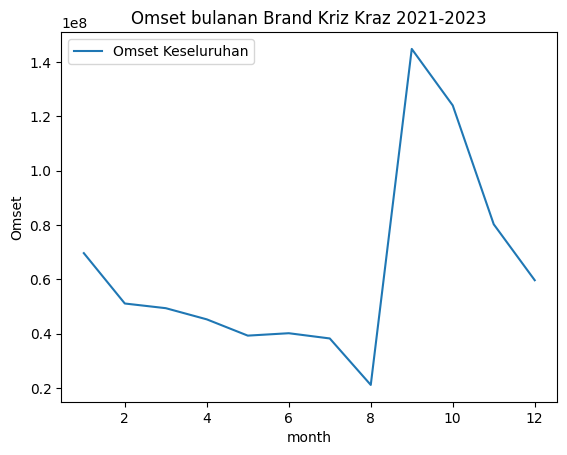

In [840]:
data.groupby(data.month)['Omset Keseluruhan'].sum().plot(legend=True)
plt.title('Omset bulanan Brand Kriz Kraz 2021-2023')
plt.ylabel('Omset')
plt.show()

In [841]:
data.groupby(data.month)['Jumlah'].sum()

month
1.0     3314.0
2.0     1214.0
3.0      931.0
4.0     1243.0
5.0      677.0
6.0      604.0
7.0      520.0
8.0      311.0
9.0     3048.0
10.0    2348.0
11.0    2113.0
12.0    1577.0
Name: Jumlah, dtype: float64

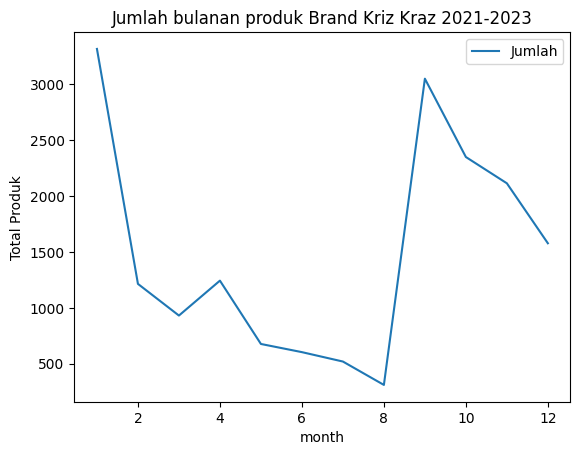

In [842]:
data.groupby(data.month)['Jumlah'].sum().plot(legend=True)
plt.title('Jumlah bulanan produk Brand Kriz Kraz 2021-2023')
plt.ylabel('Total Produk')
plt.show()

### Grafik total penjualan pertanggal dan quantity

In [843]:
data.groupby('day').count()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,Omset Keseluruhan
day,,,,,,,,,,,,,,,,,
1.0,314,314,314,314,314,314,314,314,314,314,311,3,314,0,314,314,314
2.0,465,465,465,465,465,465,465,465,465,465,464,1,465,0,465,465,465
3.0,329,329,329,329,329,329,329,329,329,329,315,14,329,0,329,329,329
4.0,286,286,286,286,286,286,286,286,286,286,266,20,286,0,286,286,286
5.0,237,237,237,237,237,237,237,237,237,237,236,1,237,0,237,237,237
6.0,304,304,304,304,304,304,304,304,304,304,304,0,304,0,304,304,304
7.0,413,413,413,413,413,413,413,413,413,413,405,8,413,0,413,413,413
8.0,359,359,359,359,359,359,359,359,359,359,345,14,359,0,359,359,359
9.0,250,250,250,250,250,250,250,250,250,250,221,29,250,0,250,250,250


In [844]:
data.groupby(data.day)['Omset Keseluruhan'].sum()

day
1.0     27740528.0
2.0     27086384.0
3.0     17933761.0
4.0     18091422.0
5.0     17069375.0
6.0     18810193.0
7.0     29246204.0
8.0     24936252.0
9.0     20529468.0
10.0    25110439.0
11.0    32602618.0
12.0    26390635.0
13.0    22762793.0
14.0    19852282.0
15.0    35799770.0
16.0    28011862.0
17.0    28544447.0
18.0    17548252.0
19.0    22412052.0
20.0    20702271.0
21.0    20068408.0
22.0    27076873.0
23.0    34703279.0
24.0    28399005.0
25.0    24887375.0
26.0    20858157.0
27.0    30646937.0
28.0    37198490.0
29.0    19562823.0
30.0    23839911.0
31.0    14578951.0
Name: Omset Keseluruhan, dtype: float64

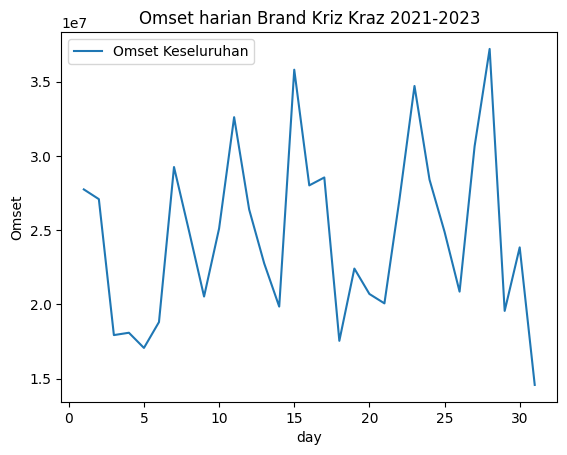

In [845]:
data.groupby(data.day)['Omset Keseluruhan'].sum().plot(legend=True)
plt.title('Omset harian Brand Kriz Kraz 2021-2023')
plt.ylabel('Omset')
plt.show()

In [846]:
data.groupby(data.day)['Jumlah'].sum()

day
1.0      457.0
2.0      652.0
3.0      422.0
4.0      424.0
5.0      324.0
6.0      408.0
7.0      603.0
8.0      511.0
9.0      366.0
10.0     491.0
11.0    2569.0
12.0     821.0
13.0     437.0
14.0     424.0
15.0     716.0
16.0     574.0
17.0     738.0
18.0     361.0
19.0     448.0
20.0     422.0
21.0     340.0
22.0     388.0
23.0     693.0
24.0     555.0
25.0     687.0
26.0     398.0
27.0     506.0
28.0    1011.0
29.0     431.0
30.0     481.0
31.0     242.0
Name: Jumlah, dtype: float64

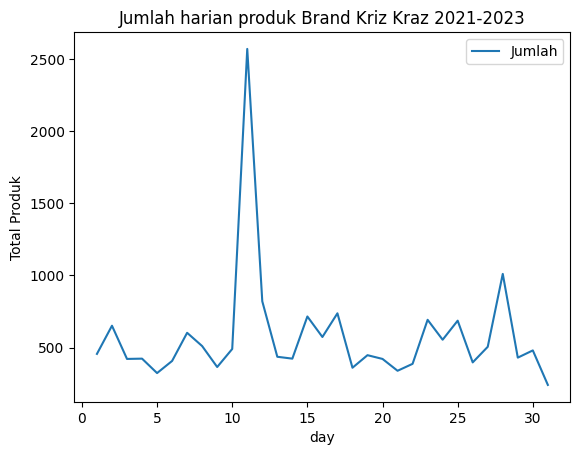

In [847]:
data.groupby(data.day)['Jumlah'].sum().plot(legend=True)
plt.title('Jumlah harian produk Brand Kriz Kraz 2021-2023')
plt.ylabel('Total Produk')
plt.show()

<Axes: xlabel='day'>

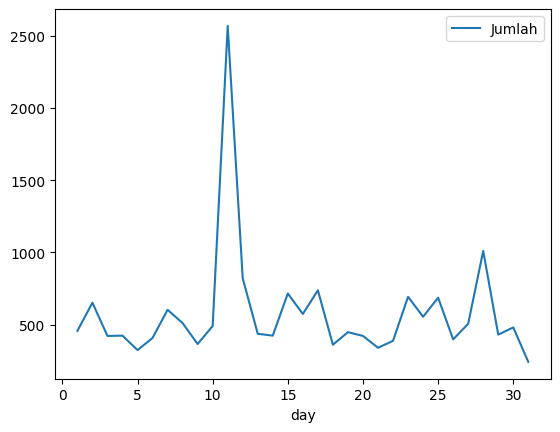

In [848]:
data.groupby(data.day)['Jumlah'].sum().plot(legend=True)

In [849]:
data['month_year'] = pd.to_datetime(data['Dates']).dt.to_period('D')
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,day,Omset Keseluruhan,month_year
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,58000.0,2022-01-15
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,58000.0,2022-01-15
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,58000.0,2022-01-15
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,77000.0,2022-01-15
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,77000.0,2022-01-15


# 6. Rata-rata pelanggan spend berapa RP per order

In [850]:
df_spend=data.groupby(['No. Pesanan','Total Pembayaran']).count()

In [851]:
df_spend.sort_values(by=['Total Pembayaran'], ascending=False)

,,level_0,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,day,Omset Keseluruhan,month_year
No. Pesanan,Total Pembayaran,,,,,,,,,,,,,,,,,
220428R5HKE1SW,7507565.0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1
220111FGBFAQ7P,5141000.0,2,2,2,2,2,2,2,2,2,0,2,0,2,2,2,2,2
221027G4JVXAEH,1769000.0,7,7,7,7,7,7,7,7,7,0,7,0,7,7,7,7,7
JKT111-18102021-077-A018,1500000.0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1
JKT111-16042022-077-A058,1445000.0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JKT111-19042022-077-A063,0.0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1
JKT111-13122021-077-A037,0.0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1
JKT111-19012023-077-A104,0.0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1


In [852]:
grouped=data.groupby([data.month, data.day])['Omset Keseluruhan'].sum()

In [853]:
grouped.sort_values()

month  day 
5.0    10.0           0.0
       9.0            0.0
2.0    19.0       38000.0
3.0    19.0       47246.0
12.0   30.0       47455.0
                  ...    
9.0    28.0    12624752.0
       24.0    13657630.0
1.0    11.0    14232400.0
9.0    27.0    18213299.0
       23.0    18460948.0
Name: Omset Keseluruhan, Length: 337, dtype: float64

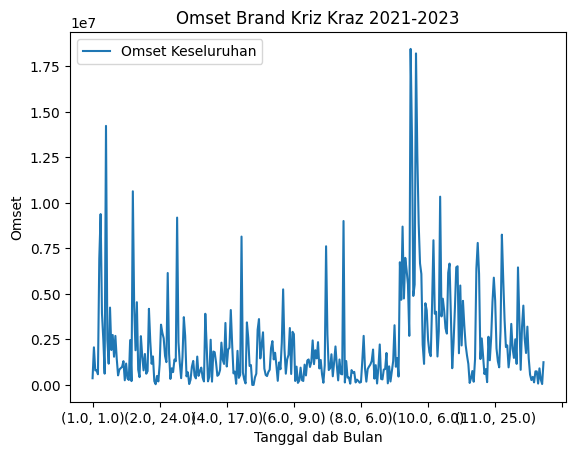

In [854]:
data.groupby([data.month, data.day])['Omset Keseluruhan'].sum().plot(legend=True)
plt.title('Omset Brand Kriz Kraz 2021-2023')
plt.ylabel('Omset')
plt.xlabel('Tanggal dab Bulan')
plt.show()

In [855]:
grouped1=data.groupby([data.month, data.day])['Jumlah'].sum()

In [856]:
grouped1.sort_values()

month  day 
5.0    10.0       1.0
       3.0        2.0
7.0    27.0       2.0
       23.0       3.0
8.0    6.0        3.0
                ...  
11.0   12.0     304.0
9.0    27.0     319.0
       23.0     426.0
4.0    28.0     509.0
1.0    11.0    2117.0
Name: Jumlah, Length: 337, dtype: float64

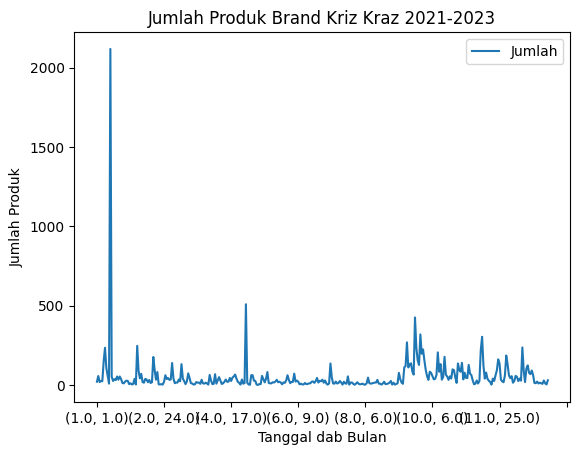

In [857]:
data.groupby([data.month, data.day])['Jumlah'].sum().plot(legend=True)
plt.title('Jumlah Produk Brand Kriz Kraz 2021-2023')
plt.ylabel('Jumlah Produk')
plt.xlabel('Tanggal dab Bulan')
plt.show()

In [858]:
data.groupby('Provinsi').agg({'No. Pesanan': ['nunique']})

,No. Pesanan
,nunique
Provinsi,
BALI,48
BANGKA BELITUNG,19
BANTEN,477
BENGKULU,2
DI YOGYAKARTA,67
DKI JAKARTA,1081
GORONTALO,4
JAMBI,37


In [859]:
data.groupby('Provinsi').agg({'Omset Keseluruhan': ['sum', 'count']})


Omset Keseluruhan      
                                             sum count
Provinsi                                              
BALI                                   8362622.0   127
BANGKA BELITUNG                        2053174.0    53
BANTEN                               123419517.0  1241
BENGKULU                                256160.0     6
DI YOGYAKARTA                         12510940.0   181
DKI JAKARTA                          206357984.0  2686
GORONTALO                              2172330.0    12
JAMBI                                  7817778.0   115
JAWA BARAT                           238938507.0  3370
JAWA TENGAH                           27503903.0   517
JAWA TIMUR                            51729339.0   908
KALIMANTAN BARAT                       3507674.0    76
KALIMANTAN SELATAN                     4680842.0   104
KALIMANTAN TENGAH                      2373045.0    18
KALIMANTAN TIMUR                       3204191.0    76
KALIMANTAN UTARA                        403782.0     5
KEPULAUAN RIAU                         1815269.0    49
LAMPUNG                                6450854.0   120
NANGGROE ACEH DARUSSALAM (NAD)         1582228.0    41
NUSA TENGGARA BARAT (NTB)              1612572.0    48
NUSA TENGGARA TIMUR (NTT)              2951000.0     8
RIAU                                   9271201.0   129
SULAWESI SELATAN                       4201826.0    76
SULAWESI TENGAH                         617400.0    11
SULAWESI TENGGARA                       -28000.0     1
SULAWESI UTARA                          531000.0    10
SUMATERA BARAT                         6867769.0   126
SUMATERA SELATAN                       3785306.0   105
SUMATERA UTARA                         5838525.0   142

In [860]:
data.groupby('Kota/Kabupaten').agg({'No. Pesanan': ['nunique']})

,No. Pesanan
,nunique
Kota/Kabupaten,
-,2
Gunungkidul,1
Jakarta Selatan,8
KAB. AGAM,4
KAB. BADUNG,12
...,...
KOTA TEGAL,1
KOTA YOGYAKARTA,19


In [861]:
data.groupby('Kota/Kabupaten').agg({'Omset Keseluruhan': ['sum', 'count']})

Omset Keseluruhan      
                                sum count
Kota/Kabupaten                           
-                          178000.0     6
Gunungkidul                 20000.0     2
Jakarta Selatan           1580000.0    24
KAB. AGAM                  618400.0    12
KAB. BADUNG               4946223.0    41
...                             ...   ...
KOTA TEGAL                 159000.0     3
KOTA YOGYAKARTA           4389230.0    61
Purwokerto                 233000.0     3
Tangerang Selatan          420000.0     3
nan                      21649039.0   335

[210 rows x 2 columns]

14. Berapa jumlah pelanggan yang repurchase lebih dari 1, lebih dari 2, lebih dari 3

In [862]:
repurchase=data.groupby(['No. Pesanan','year']).count()

In [863]:
repurchase>3

,,level_0,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,month,day,Omset Keseluruhan,month_year
No. Pesanan,year,,,,,,,,,,,,,,,,,
1072796741.0,2022.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1072798993.0,2022.0,True,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True
1073083268.0,2022.0,True,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True
1073308370.0,2022.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1073940172.0,2022.0,True,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JKT111-30092021-077-A013,2021.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
JKT111-30102021-077-A024,2021.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
JKT111-30112021-077-A033,2021.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#Time Series


In [864]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

#Data Omset Keseluruhan

In [865]:
data.head()

,level_0,No. Pesanan,Waktu Pembayaran Dilakukan,Nama Produk,Jumlah,Alamat Pengiriman,Perkiraan Ongkos Kirim,Total Pembayaran,Market place,Kota/Kabupaten,Provinsi,index,Dates,Hours,year,month,day,Omset Keseluruhan,month_year
0,0,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Kentang Balado - 75gr,2.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,58000.0,2022-01-15
1,1,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,58000.0,2022-01-15
2,2,1072796741.0,2022-01-15 09:12:23,Kriz Kraz - Keripik Singkong Rumput Laut BBQ,1.0,"Jl. Komp. Griya Caraka, Kec. Arcamanik, Kota B...",8400.0,66400.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,58000.0,2022-01-15
3,3,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Kentang Keju - 75gr,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,77000.0,2022-01-15
4,4,1072798993.0,2022-01-15 12:05:47,Kriz Kraz - Keripik Singkong Jagung Bakar,1.0,"Srengganan Dalam 1/28\nSimokerto, Kota Surabay...",23500.0,100500.0,Tokopedia,nan,NaN,NaN,2022-01-15,NaT,2022.0,1.0,15.0,77000.0,2022-01-15


In [866]:
datacopy=data.copy()

In [867]:
datacopy.columns.tolist()

['level_0',
 'No. Pesanan',
 'Waktu Pembayaran Dilakukan',
 'Nama Produk',
 'Jumlah',
 'Alamat Pengiriman',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Market place',
 'Kota/Kabupaten',
 'Provinsi',
 'index',
 'Dates',
 'Hours',
 'year',
 'month',
 'day',
 'Omset Keseluruhan',
 'month_year']

## Data Mingguan

In [868]:
dataforcast1=datacopy.drop(columns=['index',
 'No. Pesanan','Nama Produk',
 'Jumlah',
 'Alamat Pengiriman',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Market place',
 'Kota/Kabupaten',
 'Provinsi',
  'Waktu Pembayaran Dilakukan',
 'Hours',
 'year',
 'month',
 'day','month_year'],axis=1)

In [869]:
dataforcast1

,level_0,Dates,Omset Keseluruhan
0,0,2022-01-15,58000.0
1,1,2022-01-15,58000.0
2,2,2022-01-15,58000.0
3,3,2022-01-15,77000.0
4,4,2022-01-15,77000.0
...,...,...,...
10729,314,2023-02-08,0.0
10730,315,2023-02-14,0.0
10731,316,2023-02-14,0.0
10732,317,2023-02-14,0.0


In [870]:
dataforcast1

,level_0,Dates,Omset Keseluruhan
0,0,2022-01-15,58000.0
1,1,2022-01-15,58000.0
2,2,2022-01-15,58000.0
3,3,2022-01-15,77000.0
4,4,2022-01-15,77000.0
...,...,...,...
10729,314,2023-02-08,0.0
10730,315,2023-02-14,0.0
10731,316,2023-02-14,0.0
10732,317,2023-02-14,0.0


In [871]:
dataforcast1.drop(0.0,axis=0)

,level_0,Dates,Omset Keseluruhan
1,1,2022-01-15,58000.0
2,2,2022-01-15,58000.0
3,3,2022-01-15,77000.0
4,4,2022-01-15,77000.0
5,5,2022-01-15,77000.0
...,...,...,...
10729,314,2023-02-08,0.0
10730,315,2023-02-14,0.0
10731,316,2023-02-14,0.0
10732,317,2023-02-14,0.0


In [872]:
dataforcast1=dataforcast1.loc[0:10552]

In [873]:
GB1=dataforcast1.groupby([pd.Grouper(key='Dates', freq='W-MON')]).sum()

In [874]:
GB1

,level_0,Omset Keseluruhan
Dates,,
2021-09-13,621,2000000.0
2021-09-20,2445280,38154429.0
2021-09-27,4275391,68959070.0
2021-10-04,2346819,41946051.0
2021-10-11,1521344,23299376.0
...,...,...
2023-01-23,72708,1008000.0
2023-01-30,170036,1919000.0
2023-02-06,319448,2492000.0


In [875]:
dforcast1 = pd.DataFrame(GB1,columns=['Omset Keseluruhan'])

In [876]:
dforcast1.reset_index(drop=False, inplace=True)

In [877]:
dforcast1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Dates              76 non-null     datetime64[ns]
 1   Omset Keseluruhan  76 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


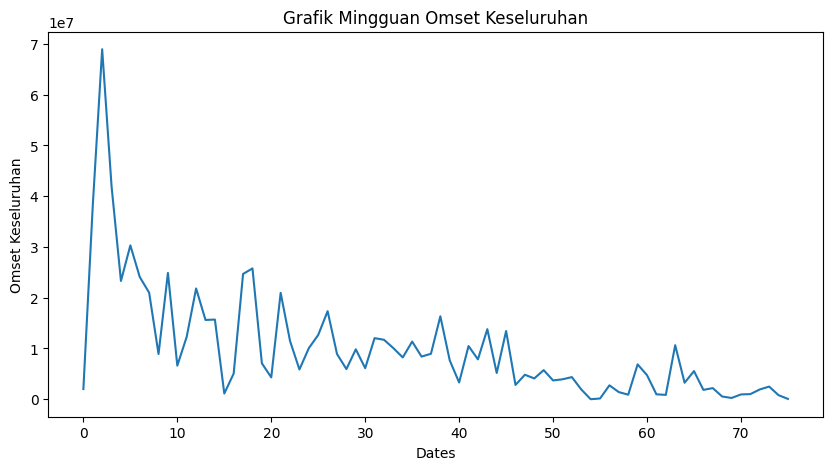

In [878]:
plt.figure(figsize=(10,5))
plt.title('Grafik Mingguan Omset Keseluruhan')
plt.xlabel('Dates')
plt.ylabel('Omset Keseluruhan')
plt.plot(dforcast1['Omset Keseluruhan'])

# Modeling menggunakan ARIMA

In [879]:
n = len(dforcast1['Omset Keseluruhan'])
print (n)
train_test_ratio1 =  0.70
dtrain1= dforcast1['Omset Keseluruhan'][:int(n*train_test_ratio1)]
dtest1 = dforcast1['Omset Keseluruhan'][int(n*train_test_ratio1):]

print(f"Train/Test: {len(dtrain1)}/{len(dtest1)}")

76
Train/Test: 53/23


## Cek Stationer

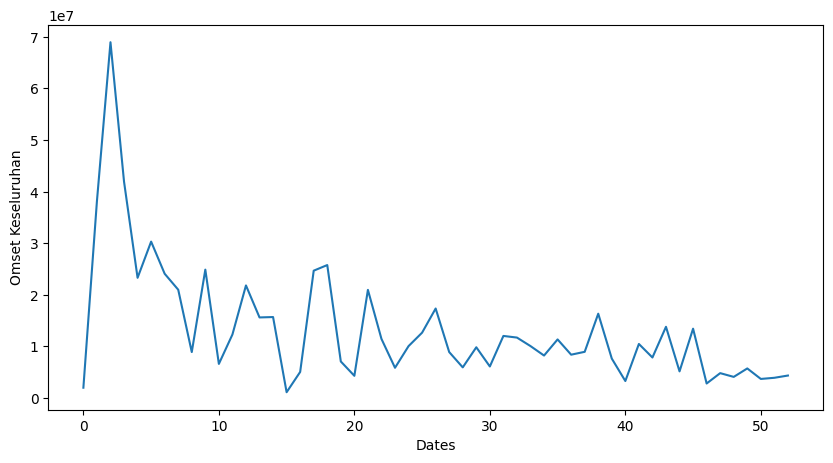

In [880]:
plt.figure(figsize=(10,5))
plt.xlabel('Dates')
plt.ylabel('Omset Keseluruhan')
plt.plot(dtrain1)

In [881]:
def cek_stationary(sales):
    result = adfuller(sales)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('lags-used: {}'.format(result[2]))
    print('number of Observations: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

cek_stationary(dtrain1)

ADF Statistic: -3.5907014698155924
p-value: 0.005941304287776327
lags-used: 6
number of Observations: 46
Critical Values:
	1%: -3.5812576580093696
	5%: -2.9267849124681518
	10%: -2.6015409829867675


Pengujian stasioner menggunakan hypothesis testing, Ho ditolak jika hasil p-value < 0,05, berikut analisis pada studi kasus data roberries :

Ho : data stasioner

H1 : data tidak stasioner

Dari hasil output diatas menggunakan software python, diperoleh p-value  0.0059 lebih kecil dari 0,05, sehingga Ho diterima. Maka, dapat disimpulkan bahwa data stasioner dan tidak perlu dilakukan diferensiasi

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


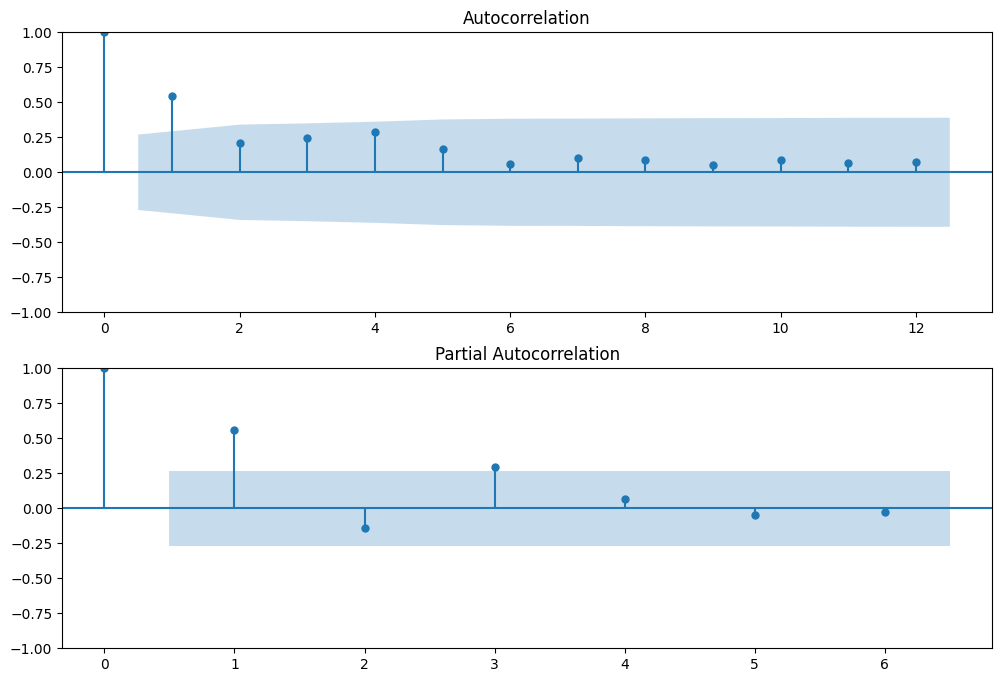

In [882]:
# Menentukan nilai AR (PACF) dan MA (ACF)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtrain1.values,lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtrain1.values,lags=6,ax=ax2)

In [883]:
# ARIMA
!pip install pmdarima > /dev/null
import pmdarima as pm

In [884]:
sarima_model = pm.auto_arima(
    y=dtrain1,                #Data Train
    stationary=True,          #Data tidak statis tetapi ada Trend
    seasonal=False,            # Data untuk periode - Musiman
  #  test='kpss',               # Tes: Kwiatkowski–Phillips–Schmidt–Shin (uji stasioner)
    #seasonal_test ='ocsb',     # Tes: Osborn-Chui-Smith-Birchenhall
    start_p=1, max_p=5,        # check p dalam rentang [1,4]
    d=None,                    # Check d berdasarkan parameter pengujian (tes default = 'kpss')
    start_q=1, max_q=5,        # Check q dalam interval [1,4]
    # start_P=1, max_P=5,        # Check P dalam interval [1,4]
    # D=None,                   # Check D berdasarkan parameter season_test (tes default = 'ocsb')
    # start_Q=1, max_Q=5  ,      # Check Q dalam rentang [1,4]
    # m=12      ,               # m=12 karena datanya siklus 12 bulan
   trace=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1884.904, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1880.111, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1862.935, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1871.198, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1922.285, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1864.417, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1899.343, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1868.890, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.329 seconds


In [885]:
# Forecast testing

prediction, confint = sarima_model.predict(n_periods=4, return_conf_int=True)

prediction

53    8.465681e+06
54    1.068153e+07
55    1.187685e+07
56    1.252165e+07
dtype: float64

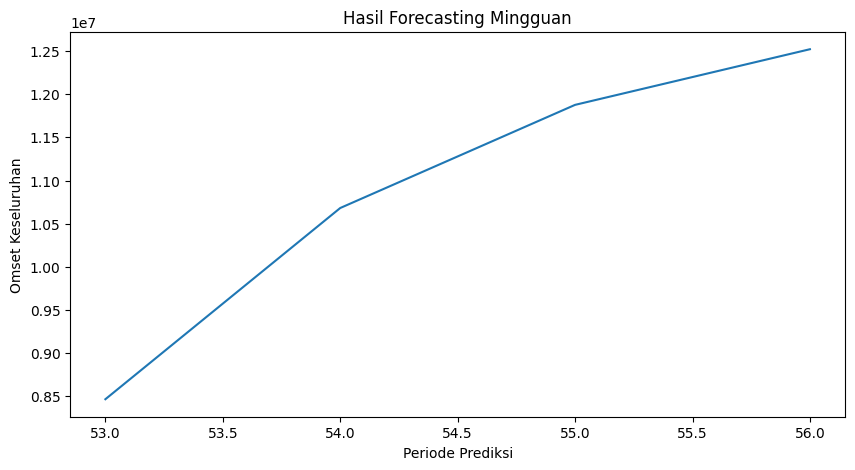

In [886]:
plt.figure(figsize=(10,5))
plt.title ('Hasil Forecasting Mingguan')
plt.xlabel('Periode Prediksi')
plt.ylabel('Omset Keseluruhan')
plt.plot(prediction)

In [887]:
predicted_values, confint = sarima_model.predict(
    n_periods=5, 
    return_conf_int=True
)
confint_df = pd.DataFrame(confint)
date_index = pd.date_range(
    start = dtrain1.index[-1],
    periods = 5,
    freq='W' # MS = Month Start Frequency
)

In [888]:
predicted_df = pd.DataFrame({'value':list(predicted_values)})
predicted_df.head()

,value
0,8.465681e+06
1,1.068153e+07
2,1.187685e+07
3,1.252165e+07
4,1.286948e+07


In [889]:
import statsmodels.api as sm

In [890]:
model = sm.tsa.arima.ARIMA(dtrain1, order=(1,0,0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Omset Keseluruhan   No. Observations:                   53
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -928.467
Date:                Thu, 11 May 2023   AIC                           1862.933
Time:                        15:47:12   BIC                           1868.844
Sample:                             0   HQIC                          1865.206
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.342e+07   9.19e-10   1.46e+16      0.000    1.34e+07    1.34e+07
ar.L1          0.5529      0.082      6.757      0.000       0.393       0.713
sigma2      9.575e+13   4.24e-16   2.26e+29      0.000    9.57e+13    9.57e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):               115.06
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

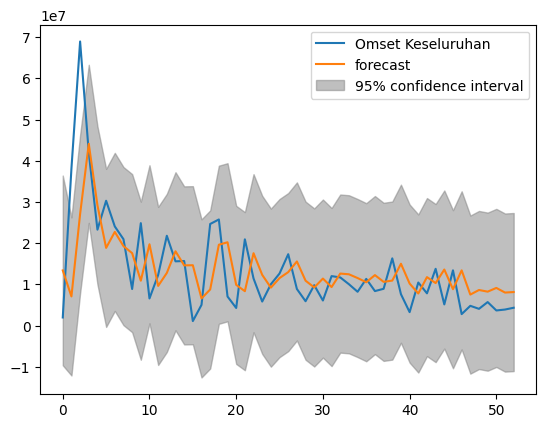

In [891]:
fig, ax = plt.subplots()
ax = dtrain1.plot(ax=ax)
plot_predict(result,ax=ax)
plt.show()

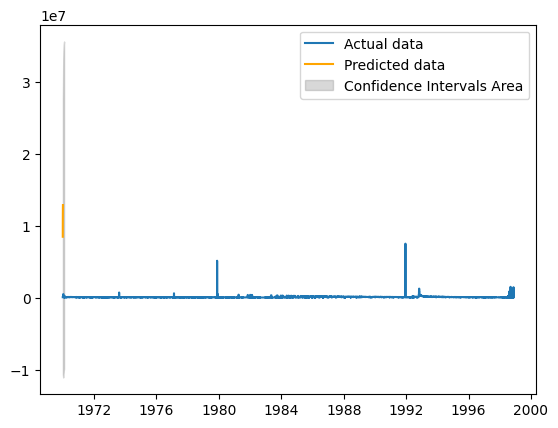

In [892]:
plt.plot(dataforcast1['Omset Keseluruhan'], label='Actual data')
plt.plot(predicted_df, color='orange', label='Predicted data')
plt.fill_between(date_index, confint_df[0], confint_df[1],color='grey',alpha=.3, label='Confidence Intervals Area')

plt.legend()
plt.show()

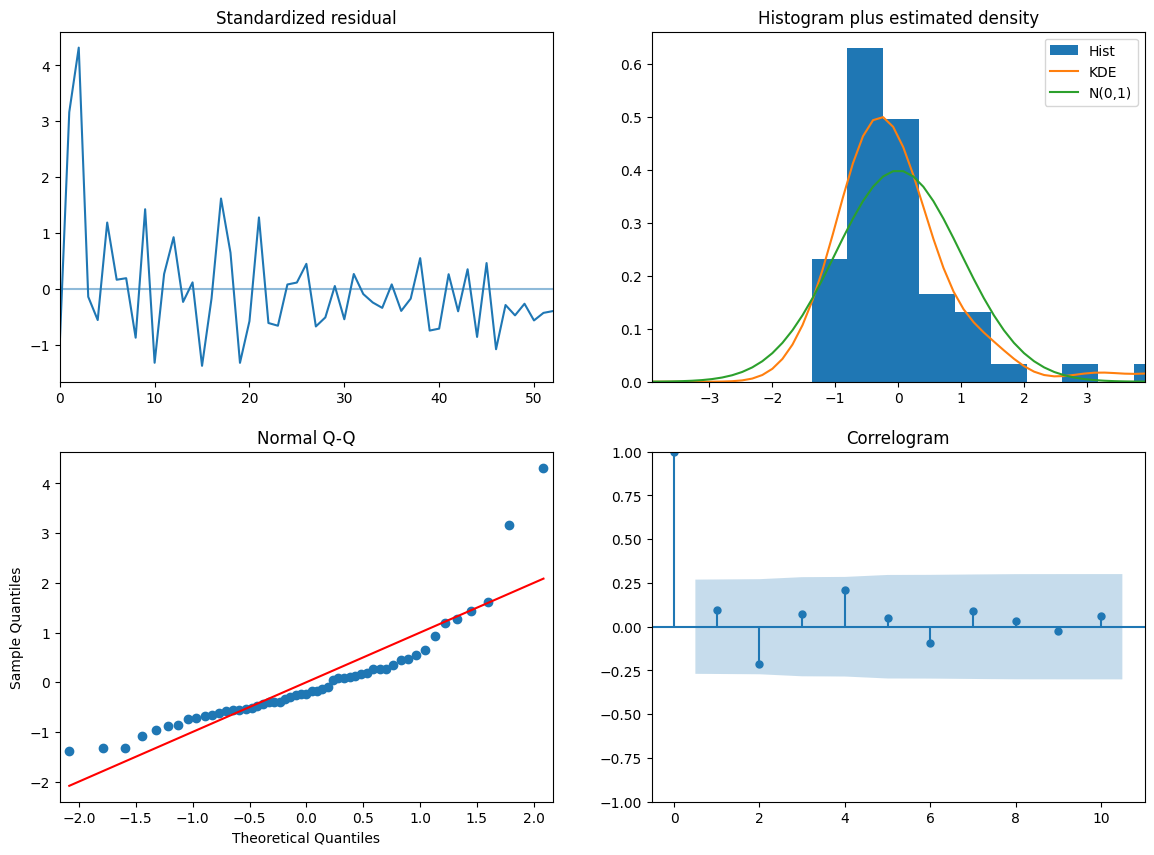

In [893]:
sarima_model.plot_diagnostics(figsize=(14,10))
plt.show()

## Mape

In [894]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [895]:
smape=calcsmape(dtest1,prediction)
smape

0.282301361978707

## Data Bulanan

In [896]:
dataforcast=datacopy.drop(columns=['index',
 'No. Pesanan','Nama Produk',
 'Jumlah',
 'Alamat Pengiriman',
 'Perkiraan Ongkos Kirim',
 'Total Pembayaran',
 'Market place',
 'Kota/Kabupaten',
 'Provinsi',
  'Waktu Pembayaran Dilakukan',
 'Hours',
 'Dates',
 'day','month_year'],axis=1)

In [897]:
dataforcast.head()

,level_0,year,month,Omset Keseluruhan
0,0,2022.0,1.0,58000.0
1,1,2022.0,1.0,58000.0
2,2,2022.0,1.0,58000.0
3,3,2022.0,1.0,77000.0
4,4,2022.0,1.0,77000.0


## Data Bulanan


In [898]:
GB = dataforcast.groupby([(dataforcast.year), (dataforcast.month)]).sum()

In [899]:
GB

level_0  Omset Keseluruhan
year   month                            
2021.0 9.0    8297829        137279643.0
       10.0   5848067        112013400.0
       11.0   4172834         60579635.0
       12.0   3405735         48955626.0
2022.0 1.0    2720690         64784996.0
       2.0    2582568         48346317.0
       3.0    2613374         49374241.0
       4.0    3051240         45258413.0
       5.0    4828765         39266760.0
       6.0    4355797         40154380.0
       7.0    3246536         38225731.0
       8.0    1988782         21112000.0
       9.0     716414          7584000.0
       10.0   1155676         12036725.0
       11.0   2429397         19697500.0
       12.0   1357841         10716000.0
2023.0 1.0     488376          4863850.0
       2.0     391227          2752000.0

In [900]:
dforcast = pd.DataFrame(GB,columns=['Omset Keseluruhan'])

In [901]:
dforcast.reset_index(drop=False, inplace=True)

In [902]:
dforcast.head()

,year,month,Omset Keseluruhan
0,2021.0,9.0,137279643.0
1,2021.0,10.0,112013400.0
2,2021.0,11.0,60579635.0
3,2021.0,12.0,48955626.0
4,2022.0,1.0,64784996.0


#Modelling menggunakan auto arima menggunakan data bulanan

## Identifikasi Model

In [903]:
n = len(dforcast['Omset Keseluruhan'])
print (n)
train_test_ratio =  0.80
dtrain= dforcast['Omset Keseluruhan'][:int(n*train_test_ratio)]
dtest = dforcast['Omset Keseluruhan'][int(n*train_test_ratio):]

print(f"Train/Test: {len(dtrain)}/{len(dtest)}")

18
Train/Test: 14/4


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


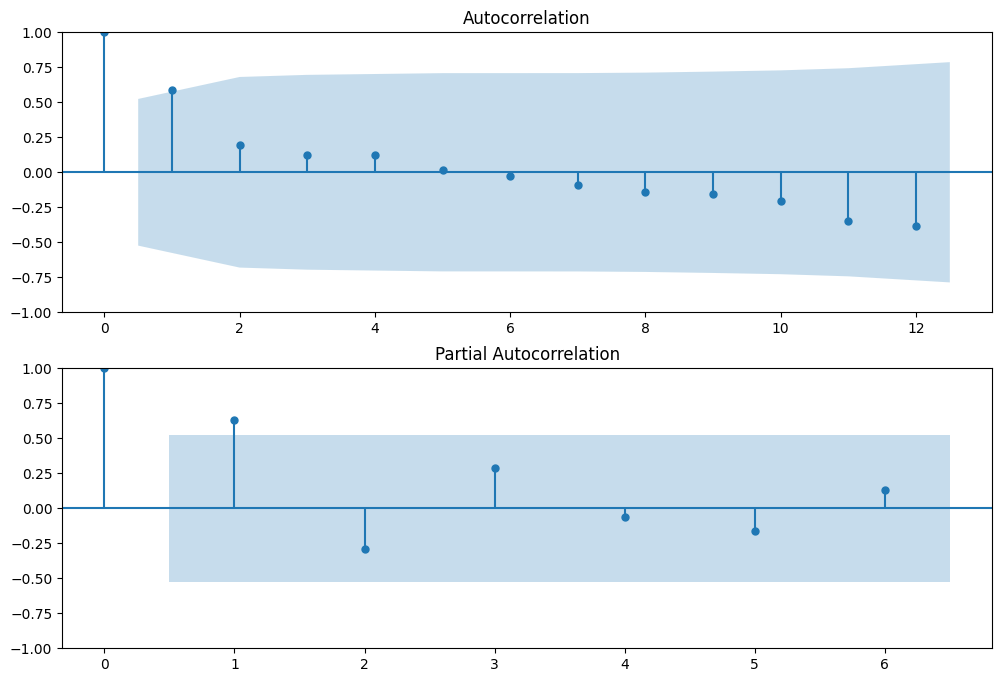

In [904]:
# Menentukan nilai AR (PACF) dan MA (ACF)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtrain.values,lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtrain.values,lags=6,ax=ax2)

In [905]:
# ARIMA
!pip install pmdarima > /dev/null
import pmdarima as pm

In [906]:
sarima_model = pm.auto_arima(
    y=dtrain,                #Data Train
    stationary=False,          #Data tidak statis tetapi ada Trend
    seasonal=False,            # Data untuk periode - Musiman
  #  test='kpss',               # Tes: Kwiatkowski–Phillips–Schmidt–Shin (uji stasioner)
    #seasonal_test ='ocsb',     # Tes: Osborn-Chui-Smith-Birchenhall
    start_p=1, max_p=5,        # check p dalam rentang [1,4]
    d=None,                    # Check d berdasarkan parameter pengujian (tes default = 'kpss')
    start_q=1, max_q=5,        # Check q dalam interval [1,4]
    # start_P=1, max_P=5,        # Check P dalam interval [1,4]
    # D=None,                   # Check D berdasarkan parameter season_test (tes default = 'ocsb')
    # start_Q=1, max_Q=5  ,      # Check Q dalam rentang [1,4]
    # m=12      ,               # m=12 karena datanya siklus 12 bulan
   trace=True,
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=486.360, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=472.023, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=474.072, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=495.570, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=474.124, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.170 seconds


In [907]:
# Forecast testing

prediction, confint = sarima_model.predict(n_periods=4, return_conf_int=True)

prediction

14    2.402654e+06
15   -7.231416e+06
16   -1.686549e+07
17   -2.649956e+07
dtype: float64

In [908]:
predicted_values, confint = sarima_model.predict(
    n_periods=5, 
    return_conf_int=True
)
confint_df = pd.DataFrame(confint)
date_index = pd.date_range(
    start = dtrain.index[-1],
    periods = 5,
    freq='W' # MS = Month Start Frequency
)

In [909]:
predicted_df = pd.DataFrame({'value':list(predicted_values)})
predicted_df.head()

,value
0,2.402654e+06
1,-7.231416e+06
2,-1.686549e+07
3,-2.649956e+07
4,-3.613363e+07


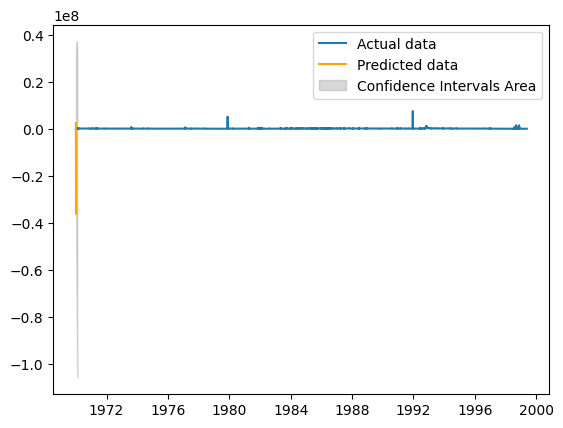

In [910]:
plt.plot(dataforcast['Omset Keseluruhan'], label='Actual data')
plt.plot(predicted_df, color='orange', label='Predicted data')
plt.fill_between(date_index, confint_df[0], confint_df[1],color='grey',alpha=.3, label='Confidence Intervals Area')

plt.legend()
plt.show()

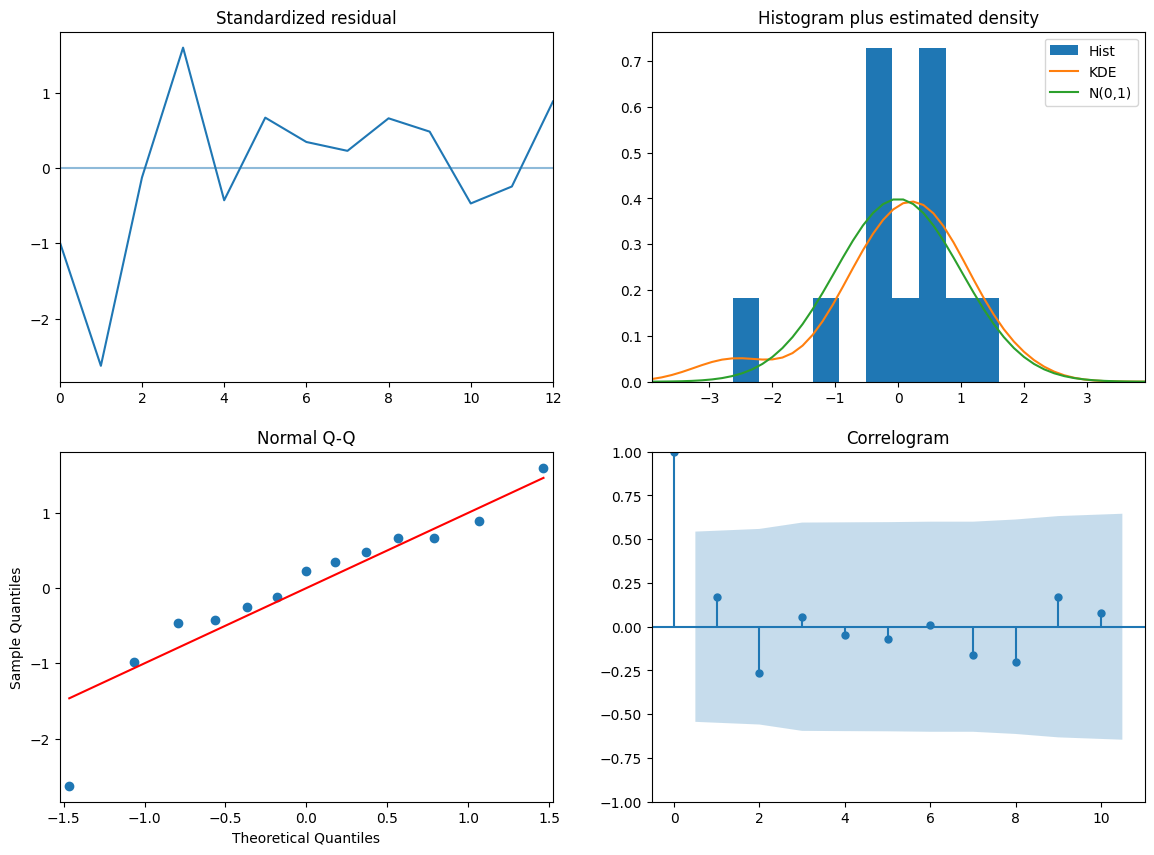

In [911]:
sarima_model.plot_diagnostics(figsize=(14,10))
plt.show()

## MAPE

In [912]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [913]:
smape=calcsmape(dtest,prediction)
smape

1.8912833664959399